<a href="https://colab.research.google.com/github/herreraskarina/Exercises/blob/main/Regression_Machine_Learning_CO2_Emissions_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Canadian government needs an AI that can predict CO2 emissions into the atmosphere considering some characteristics of cars. With the construction of this AI, the government will be able to focus on issues related to improving air quality.

**Variables**
# of variables: 12

Language: Inglês

`Make:`	        Company that made the vehicle

`Model:`	        Car model. (4WD/4X4 = Four Wheel Drive, AWD = Four Wheel Drive, FFV = Flexible Fuel Vehicle, SWB = Short Wheelbase, LWB = Long Wheelbase, EWB = Extended Wheelbase)

`Vehicle Class: `  Vehicle class, depending on utility, capacity and weight

`Engine Size(L):`  Size of engine used in liters

`Cylinders:`      Number of cylinders

`Transmission:`   Transmission type with number of gears. (A = Automatic, AM = Automated manual, AS = Automatic with selection shift, AV = Continuously variable, M = Manual and values of 3 - 10 = Number of gears.)

`Fuel Type:`           Type of fuel used. (X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = Natural gas)

`Fuel Consumption City (L/100 km):`           Fuel consumption on city roads (L/100 km)

`Fuel Consumption Hwy (L/100 km):`            Highway fuel consumption (L/100 km)

`Fuel Consumption Comb (L/100 km):`         Combined fuel consumption (55% city, 45% highway) is shown in L/100 km

`Fuel Consumption Comb (mpg):`       Combined city and highway fuel consumption is shown in miles per gallon (mpg)

`CO2 Emissions(g/km): `    Tailpipe carbon dioxide emissions (in grams per kilometer) for combined city and highway driving


Questions:


1. Which variables most impact CO2 emissions?
2. Considering the main regression algorithms, which ones present the best results for the R2 and MSE metrics?
What could you do to improve the metrics values of the best
1. What could you do to improve the metrics values of the best algorithm?

### Activity 1: import libraries

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Activity 2: create dataset

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')
# creating dataset
df_original = pd.read_csv('/content/drive/MyDrive/CO2 Emissions_Canada.csv')
df_original.head()

Mounted at /content/drive


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Activity 3: check the dataset information (info) and its shape and description

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df_original.shape

(7385, 12)

In [5]:
df_original.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
# checking for null data
df_original.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [7]:
# there are 5 categorical variables
# checking the categories of these variables
df_original['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [8]:
df_original['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [9]:
df_original['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [10]:
df_original['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [11]:
df_original['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

### Activity 4: visualize the dispersion of variables in relation to CO2 emissions

Text(0.5, 1.05, 'Disperção entre as variaveis')

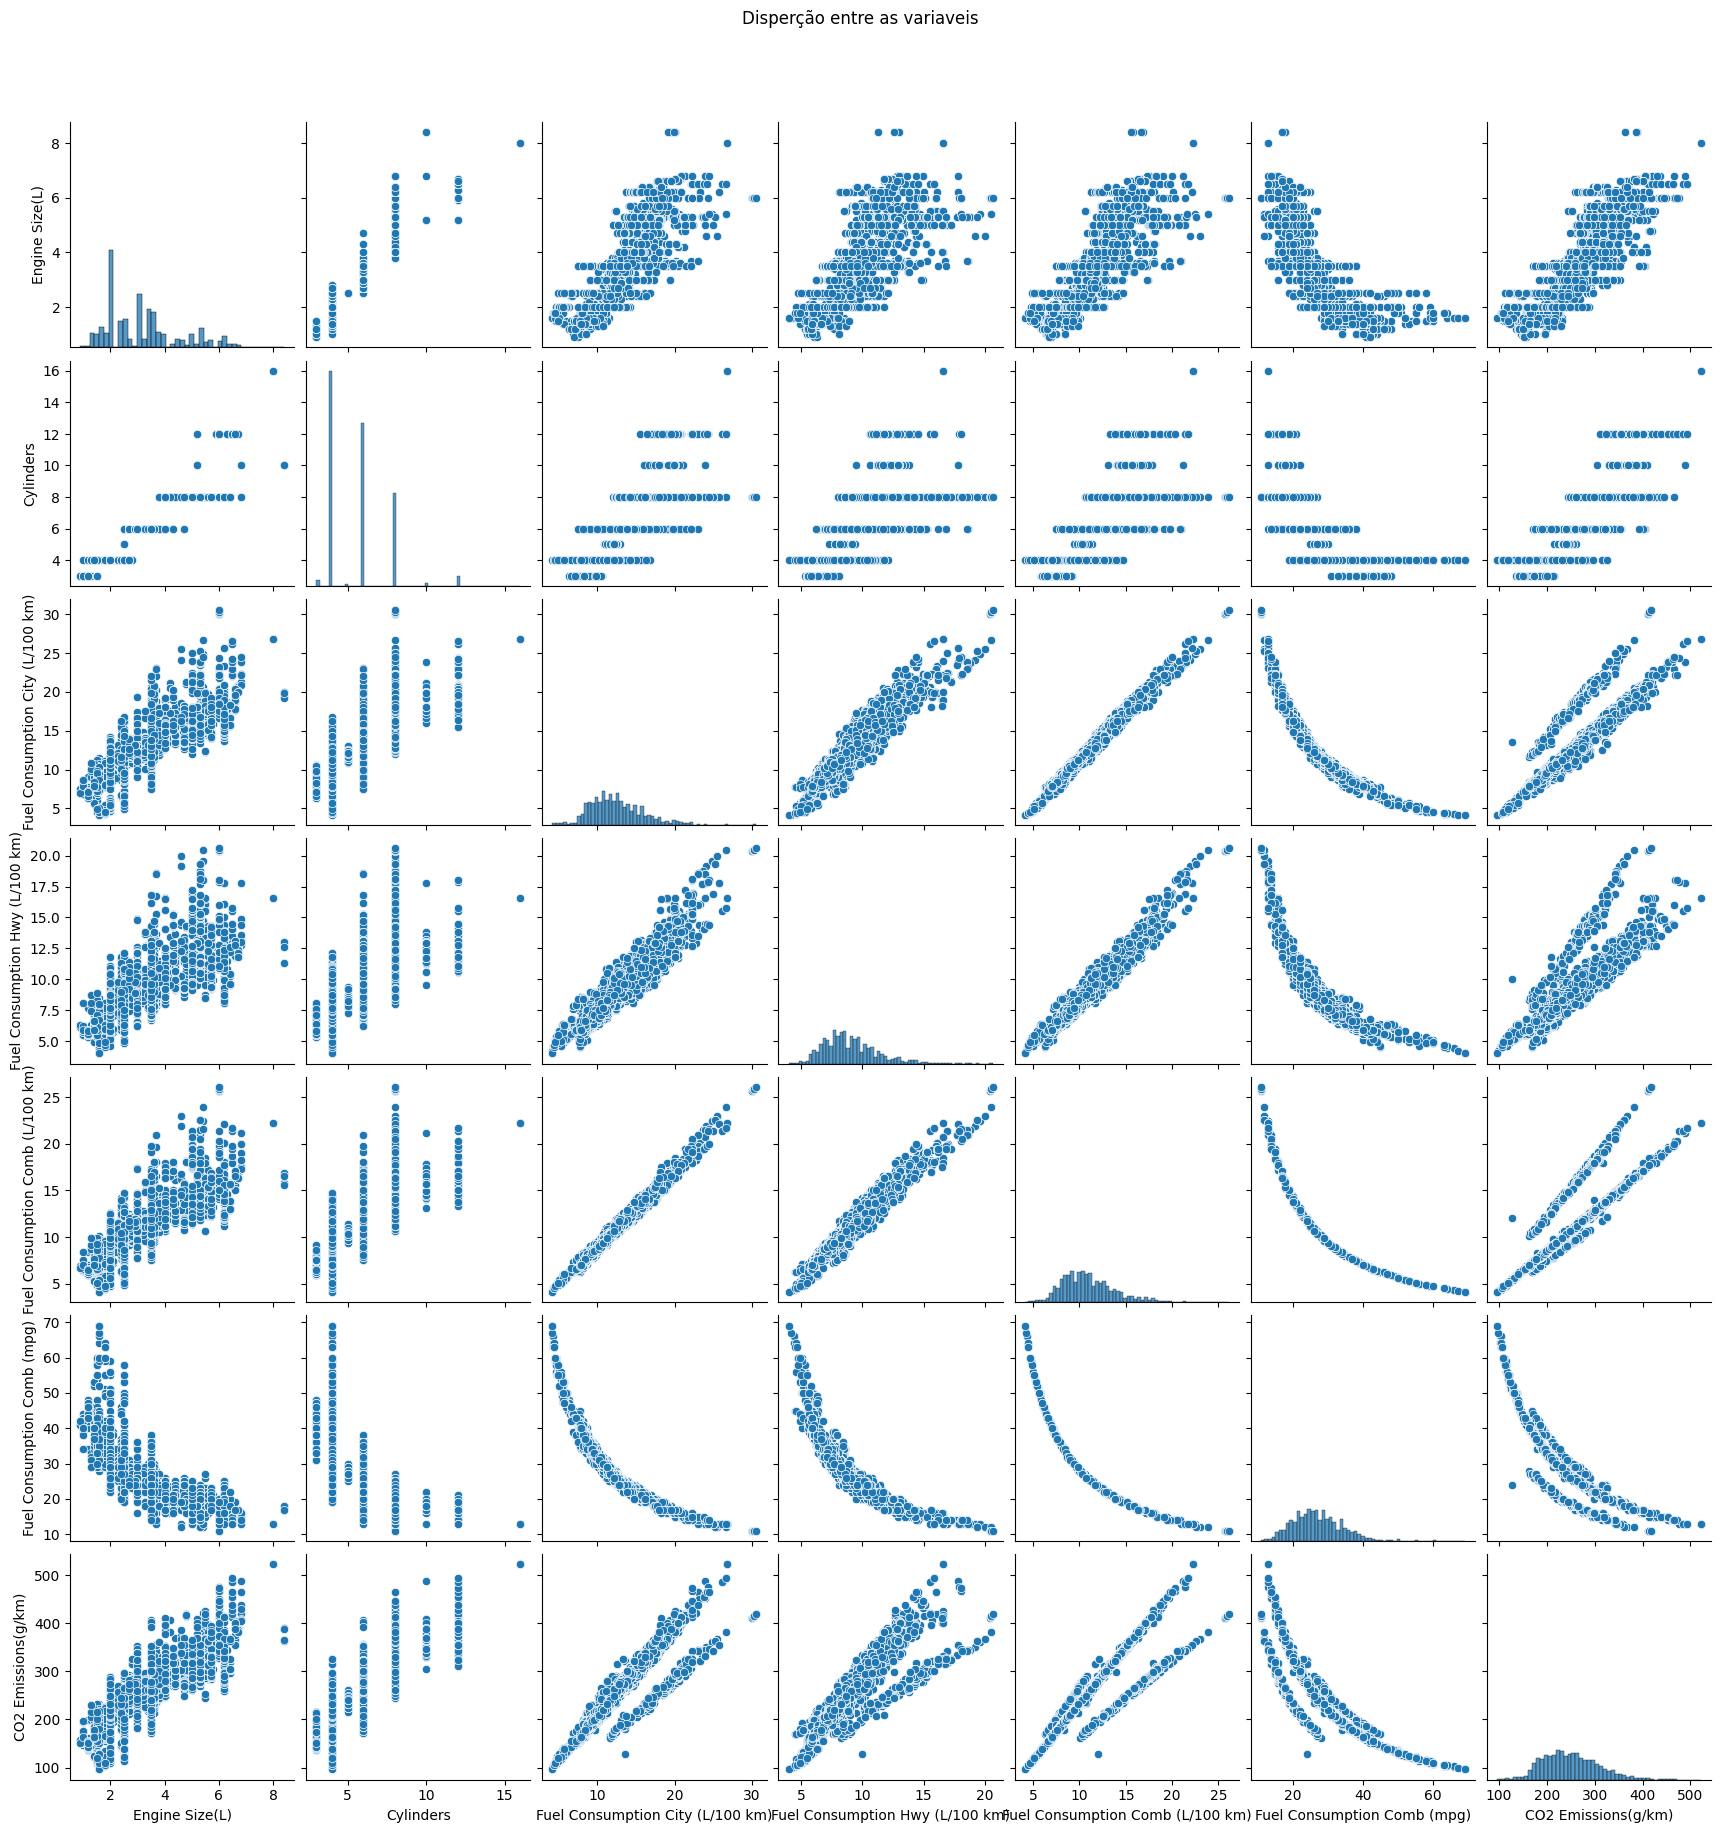

In [12]:
ax = sns.pairplot(data=df_original)
ax.fig.suptitle('Disperção entre as variaveis',y=1.05)

### Activity 5: Visualize the distribution of the CO2 emissions

<Axes: xlabel='CO2 Emissions(g/km)'>

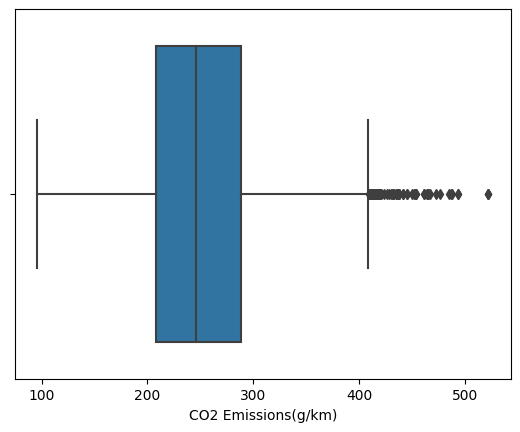

In [13]:
sns.boxplot(data=df_original, x='CO2 Emissions(g/km)')

### Activity 6: visualize the correlation between the variables

<ipython-input-14-80391310f487>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_original.corr(), vmin=-1, vmax=1, annot=False);


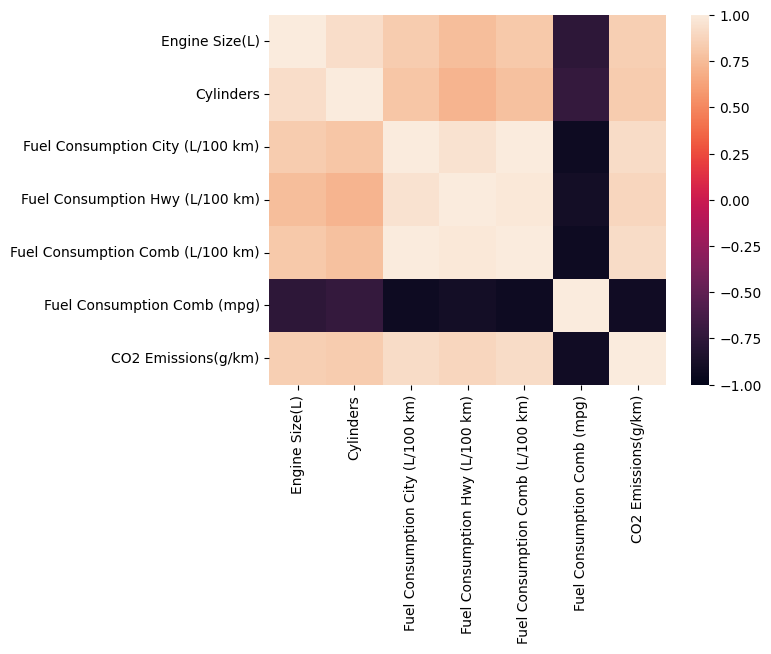

In [14]:
sns.heatmap(df_original.corr(), vmin=-1, vmax=1, annot=False);

**Comment**: there is a high negative correlation between the Fuel Consumption Comb variable and the others. Considering that in regression models it is important that there is no high correlation between variables X, it would be important to remove this variable.

### Acitivty 7: Transform categorical variables into numeric ones using Pandas or sckitlearn. After the transformation, ensure that the new values are in the dataset

In [15]:
# applying One Hot Encoding to variable Fuel Type
df_aux = pd.get_dummies(df_original['Fuel Type'], prefix='Fuel Type')
df2 = pd.concat([df_original, df_aux], axis=1)

In [16]:
# applying One Hot Encoding to variable Model
df_aux = pd.get_dummies(df_original['Model'], prefix='Model')
df2 = pd.concat([df_original, df_aux], axis=1)

In [17]:
# applying One Hot Encoding to variable Make
df_aux = pd.get_dummies(df_original['Make'], prefix='Make')
df2 = pd.concat([df_original, df_aux], axis=1)

In [18]:
# applying One Hot Encoding to variable Vehicle Class
df_aux = pd.get_dummies(df_original['Vehicle Class'], prefix='Vehicle Class')
df2 = pd.concat([df_original, df_aux], axis=1)

In [19]:
# applying One Hot Encoding to variable Transmission
df_aux = pd.get_dummies(df_original['Transmission'], prefix='Transmission')
df2 = pd.concat([df_original, df_aux], axis=1)

In [20]:
# deletando variáveis originais
df2.drop(['Make', 'Vehicle Class', 'Transmission', 'Model', 'Fuel Type'], axis=1, inplace=True)

### Activity 8: Create X and y and separate 20% of the data for test

In [21]:
df2.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission_A10,Transmission_A4,Transmission_A5,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X = df2.drop('CO2 Emissions(g/km)', axis=1)
y = df2.iloc[:, 6]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Activity 9: Create a function that takes 2 parameters: the value predicted by the model and the actual result. Based on these 2 values, the function calculates and prints R2, MSE and MAE

In [24]:
# function to calculate MAE
def calcular_mae(modelo):
    predicoes = modelo.predict(X_test)
    erro_absoluto = mean_absolute_error(predicoes, y_test)
    return erro_absoluto

# function to calculate MSE and RMSE
def calcular_e_imprimir_mse_rmse(modelo, nome_modelo):
    predicoes = modelo.predict(X_test)
    mse = mean_squared_error(predicoes, y_test)
    rmse = np.sqrt(mse)
    print(f'\nMSE do {nome_modelo}: {mse}')
    print(f'RMSE do {nome_modelo}: {rmse}')

# function to calculate R2
def calcular_e_imprimir_r2(modelo, nome_modelo):
    predicoes = modelo.predict(X_test)
    r2 = r2_score(predicoes, y_test)
    print(f'R² do {nome_modelo}: {r2}')

### Activity 10: Which variables are most important for the model?

In [25]:
# creating a function to show the 10 variables that area the most important for the prediction model
df_copia = df2.copy()
def feature_importance(modelo):
    importances = pd.Series(data=modelo.feature_importances_, index=df_copia.drop(columns=['CO2 Emissions(g/km)']).columns)
    importances.sort_values(ascending=False, inplace=True) #ordenando as variáveis
    sns.barplot(x=importances[:10], y=importances.index[:10], orient='h').set_title('Importância de cada feature')

### Activity 11: Select a regression model of your choice plus Decision Tree, Random Forest and XGBoost to train and test. For the last 3 (DT, RF and XGB) calculate which are the most important features using the function that were just created. For each of them answer:
1- How were the model evaluation metrics?

2- Which features were the most important for the model?

In [26]:
# creating Linear Regression
modeloLR = LinearRegression()
# fitting model to the train data
modeloLR.fit(X_train, y_train)

LinearRegression()

In [27]:
# creating Decision Tree model
modeloDT = DecisionTreeRegressor()
# fitting model to the train data
modeloDT.fit(X_train, y_train)

DecisionTreeRegressor()

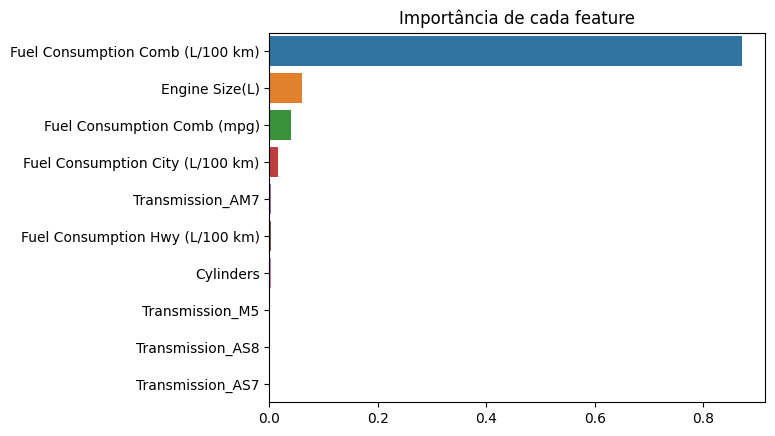

In [28]:
# calculating most important features for DT
feature_importance(modeloDT)

In [29]:
# creating Random Forest model
modeloRF = RandomForestRegressor(n_estimators=100, min_samples_leaf=2)
# fitting model to the train data
modeloRF.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2)

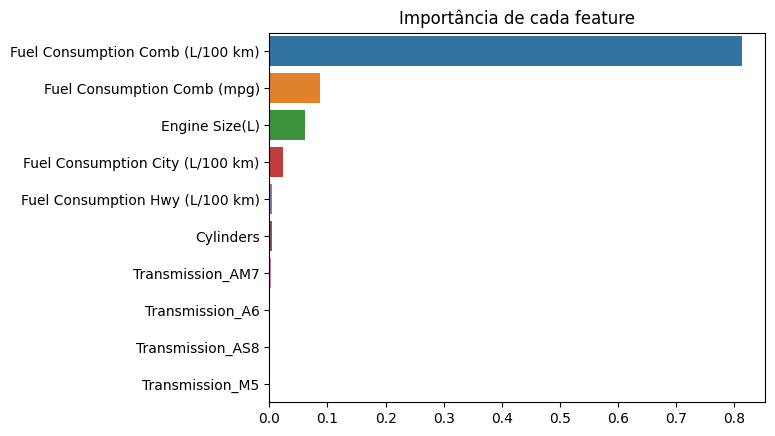

In [30]:
# calculating most important features for DT
feature_importance(modeloRF)

In [31]:
# creating XGBoost Regression model
modeloXGB = XGBRegressor()
# fitting model to the train data
modeloXGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

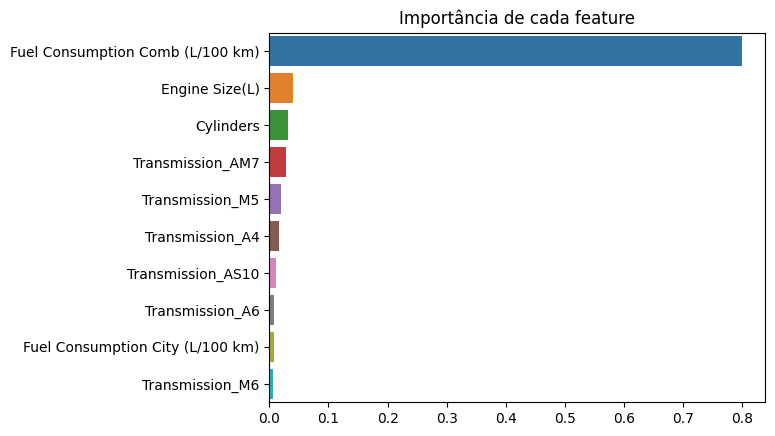

In [32]:
# calculating most important features for DT
feature_importance(modeloXGB)

In [34]:
# checking models' metrics
# MAE
Erro_absoluto_LR_modelo1 = calcular_mae(modeloLR)
print('Linear Regression:', Erro_absoluto_LR_modelo1)
Erro_absoluto_RF_modelo1 = calcular_mae(modeloRF)
print('Random Forest:', Erro_absoluto_RF_modelo1)
Erro_absoluto_XGB_modelo1 = calcular_mae(modeloXGB)
print('XGBoost:', Erro_absoluto_XGB_modelo1)
Erro_absoluto_DT_modelo1 = calcular_mae(modeloDT)
print('Decision Tree:', Erro_absoluto_DT_modelo1)

Linear Regression: 11.460481986480684
Random Forest: 3.4229798837940413
XGBoost: 3.158703002723069
Decision Tree: 2.928710578324955


In [35]:
# MSE e RMSE
calcular_e_imprimir_mse_rmse(modeloLR, 'Linear Regression')
calcular_e_imprimir_mse_rmse(modeloRF, 'Random Forest')
calcular_e_imprimir_mse_rmse(modeloXGB, 'XGBoost')
calcular_e_imprimir_mse_rmse(modeloDT, 'Decision Tree')


MSE do Linear Regression: 326.5739049568481
RMSE do Linear Regression: 18.071355924690547

MSE do Random Forest: 90.53241575545901
RMSE do Random Forest: 9.514852376966182

MSE do XGBoost: 57.32435546281835
RMSE do XGBoost: 7.571284928122726

MSE do Decision Tree: 120.05280787877271
RMSE do Decision Tree: 10.956861223852966


In [36]:
# R2
calcular_e_imprimir_r2(modeloLR, 'Linear Regression')
calcular_e_imprimir_r2(modeloRF, 'Random Forest')
calcular_e_imprimir_r2(modeloXGB, 'XGBoost')
calcular_e_imprimir_r2(modeloDT, 'Decision Tree')

R² do Linear Regression: 0.8953249294457954
R² do Random Forest: 0.9728128278224274
R² do XGBoost: 0.9831312613468245
R² do Decision Tree: 0.9646810855322798


### Activity 12: Alter the hyperparameters of XGBoost to get a better result

In [37]:
# tuning XGBoost Regression model
modeloXGB2 = XGBRegressor(n_estimators=2000, max_depth=8)
# fitting model to the train data
modeloXGB2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
Erro_absoluto_XGB_modelo2 = calcular_mae(modeloXGB2)
print('MAE of XGBoost2:', Erro_absoluto_XGB_modelo2)

MAE of XGBoost2: 2.66249654740196


In [39]:
calcular_e_imprimir_mse_rmse(modeloXGB2, 'XGBoost2')


MSE do XGBoost2: 73.56851949440423
RMSE do XGBoost2: 8.57720930690188


In [40]:
calcular_e_imprimir_r2(modeloXGB2, 'XGBoost2')

R² do XGBoost2: 0.9782043788173794


**Answer**: The results obtained by the XGBoost without changing hyperparameters are the best: R² do XGBoost: 0.9831312613468245 and RMSE do XGBoost: 7.571284928122726.